1. Import all the necessary libraries, read the dataset using pandas and analyze the data.

For data preparation phase, save the “benign” and “attack” dataframe separately. 

Drop the “Label” column from the dataset and convert benign and attack
dataframes to numpy arrays. 

Now, split the data into test and train (use 75% observations for train set and the remaining 25% for test set). Then, scale the train and test data using Standard Scalar.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
from tensorflow import keras
from numpy.random import seed
seed(1)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
!pip install tensorflow==1.14.0
!pip install keras== 2.2.4

ERROR: Could not find a version that satisfies the requirement keras== (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2)
ERROR: No matching distribution found for keras==


In [3]:
print('TensorFlow version: ', tf.__version__)
print('Keras version: ', keras.__version__)

TensorFlow version:  1.14.0
Keras version:  2.2.4-tf


In [8]:
from google.colab import files
uploaded = files.upload()

Saving network_attack_data.csv to network_attack_data.csv


In [9]:
data = pd.read_csv('network_attack_data.csv')
data.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,...,F_68,F_69,F_70,F_71,F_72,F_73,F_74,F_75,F_76,Label
0,109998919,4,3,525,0.0,520,0,131.25,259.177385,0,...,32,5735.0,0.0,5735.0,5735.0,110000000.0,0.0,110000000.0,110000000.0,1
1,109993343,4,3,531,0.0,520,0,132.75,258.218738,0,...,32,5437.0,0.0,5437.0,5437.0,110000000.0,0.0,110000000.0,110000000.0,1
2,109988359,4,3,535,0.0,520,0,133.75,257.597069,0,...,32,5505.0,0.0,5505.0,5505.0,110000000.0,0.0,110000000.0,110000000.0,1
3,109982960,4,3,530,0.0,520,0,132.50,258.376341,0,...,32,5303.0,0.0,5303.0,5303.0,110000000.0,0.0,110000000.0,110000000.0,1
4,109977744,4,3,530,0.0,520,0,132.50,258.376341,0,...,32,5356.0,0.0,5356.0,5356.0,110000000.0,0.0,110000000.0,110000000.0,1


In [10]:
benign = data['Label']== 0
attack = data['Label']!= 0

data_benign = data[benign]
data_attack = data[attack]

print(f"Benign count: {len(data_benign)}")
print(f"Attack count: {len(data_attack)}")

Benign count: 22987
Attack count: 5498


In [11]:
data = data.drop('Label',axis=1)

In [12]:
x_benign = data_benign.drop('Label',axis=1).values 
y_benign = data_benign['Label'].values

x_attack = data_attack.drop('Label',axis=1).values 
y_attack = data_attack['Label'].values

print(x_benign.shape, x_attack.shape)
print(y_benign.shape, y_attack.shape)

(22987, 76) (5498, 76)
(22987,) (5498,)


In [13]:
from sklearn.model_selection import train_test_split
x_benign_train, x_benign_test = train_test_split(x_benign, test_size=0.25, random_state=40)
print(x_benign_train.shape, x_benign_test.shape)

(17240, 76) (5747, 76)


In [14]:
import joblib
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_benign_tr_scaled= scaler.fit_transform(x_benign_train) 
x_benign_tst_scaled= scaler.transform(x_benign_test) 
x_attack_scaled= scaler.transform(x_attack)

2. Set the following hyperparameter values:

• batch_size = 32

• original_dim = 76

• latent_dim = 10

• number of neurons in the hidden layers = 50

• epochs = 100

In [15]:
batch_size = 32
original_dim = 76
latent_dim = 10
hidden_layer_sizes = 50
epochs = 100
epsilon_std = 1.0

3. Using Keras Functional API, define the encoder, sampling layer, the decoder and instantiate the VAE model. 

Note both the encoder and decoder have two hidden layers each.

In [16]:
x = keras.layers.Input(shape=(original_dim,))
h1 = keras.layers.Dense(50, activation='relu')(x)
h2 = keras.layers.Dense(50, activation='relu')(h1)
z_mean = keras.layers.Dense(latent_dim)(h2)
z_log_var = keras.layers.Dense(latent_dim)(h2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
K = keras.backend

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [18]:
z = keras.layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [19]:
decoder_h1 = keras.layers.Dense(50, activation='relu')
decoder_h2 = keras.layers.Dense(50, activation='relu') 
h_decoded = decoder_h2(z)

decoder_mean = keras.layers.Dense(original_dim)
x_decoded_mean = decoder_mean(h_decoded)

In [20]:
vae = keras.models.Model(x, x_decoded_mean)

4. Define the VAE loss function and compile the model using this loss metric and optimizer to be used is Adam. 

The learning rate value must be 0.001.

In [21]:
def vae_loss(feature, reconstructed):
    reconstruction_loss = keras.losses.binary_crossentropy(feature, reconstructed)
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return reconstruction_loss + kl_loss

In [22]:
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=vae_loss)
vae.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 76)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           3850        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 50)           2550        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 10)           510         dense_1[0][0]                    
______________________________________________________________________________________________

5. Train the model with batch_size and epochs set above. 

Display the loss curve during training. 

Then save the encoder, decoder and vae models (in .h5 format) using model.save.

In [23]:
history= vae.fit(x_benign_tr_scaled ,x_benign_tr_scaled, verbose = 1, batch_size=batch_size, epochs=epochs,shuffle=True,validation_split=0.2)

Train on 13792 samples, validate on 3448 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
13792/13792 [==============================] - 1s 99us/sample - loss: -0.3755 - val_loss: -0.9734
Epoch 2/100
13792/13792 [==============================] - 1s 77us/sample - loss: -1.3265 - val_loss: -1.5874
Epoch 3/100
13792/13792 [==============================] - 1s 74us/sample - loss: -1.6331 - val_loss: -1.7708
Epoch 4/100
13792/13792 [==============================] - 1s 77us/sample - loss: -1.8521 - val_loss: -1.9558
Epoch 5/100
13792/13792 [==============================] - 1s 76us/sample - loss: -1.9439 - val_loss: -2.0698
Epoch 6/100
13792/13792 [==============================] - 1s 76us/sample - loss: -1.8380 - val_loss: -1.8578
Epoch 7/100
13792/13792 [==============================] - 1s 74us/sample - loss: -2.0261 - val_loss: -2.1330
Epoch 8/100
13792/13792 [==============================] - 1s 77us/sample - loss: -1.78

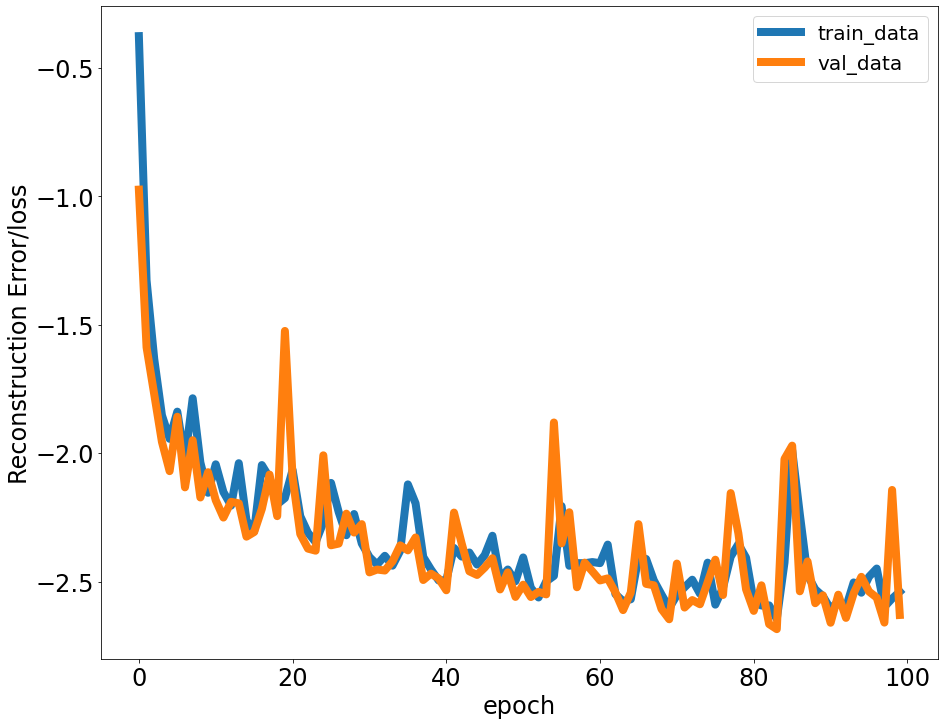

In [24]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 24
plt.rcParams["figure.figsize"] = (15,12)
plt.plot(history.history['loss'],linewidth = 8)
plt.plot(history.history['val_loss'],linewidth = 8)
plt.ylabel('Reconstruction Error/loss',fontsize = 24)
plt.xlabel('epoch',fontsize = 24)
plt.legend(['train_data', 'val_data'], loc='best',fontsize = 20)
plt.show()

In [25]:
import h5py
vae.save("vae.h5")

6. Make predictions on test data using model.predict, and visualize your plot comparing benign observations with attack observations. 

In [26]:
from sklearn import metrics

pred1 = vae.predict(x_benign_tst_scaled)
score1 = np.sqrt(metrics.mean_squared_error(pred1,x_benign_tst_scaled))

pred2 = vae.predict(x_attack_scaled)  
score2 = np.sqrt(metrics.mean_squared_error(pred2,x_attack_scaled))

print(f"Benign_test_data_score Score (RMSE): {score1}")
print(f"Attack_test_data_score (RMSE): {score2}")

Benign_test_data_score Score (RMSE): 2.43874337892902
Attack_test_data_score (RMSE): 3.775449344951257


In [27]:
tst_obs = x_benign_tst_scaled.copy()
print(tst_obs.shape)
tst_obs = np.append(tst_obs, x_attack_scaled, axis=0)
print(tst_obs.shape)
print(y_benign[0:5747].shape)

(5747, 76)
(11245, 76)
(5747,)


In [28]:
Y_obs = y_benign[0:5747].copy()
Y_obs  = np.append(Y_obs, y_attack, axis=0)
print(Y_obs.shape)

(11245,)


In [29]:
test_preds=vae.predict(tst_obs)
print(test_preds.shape)
mse_test = np.mean(np.power(tst_obs- test_preds, 2), axis=1)
print(mse_test.shape)

(11245, 76)
(11245,)


In [30]:
tst_error_data = pd.DataFrame({'recon_error': mse_test,'Label': Y_obs})

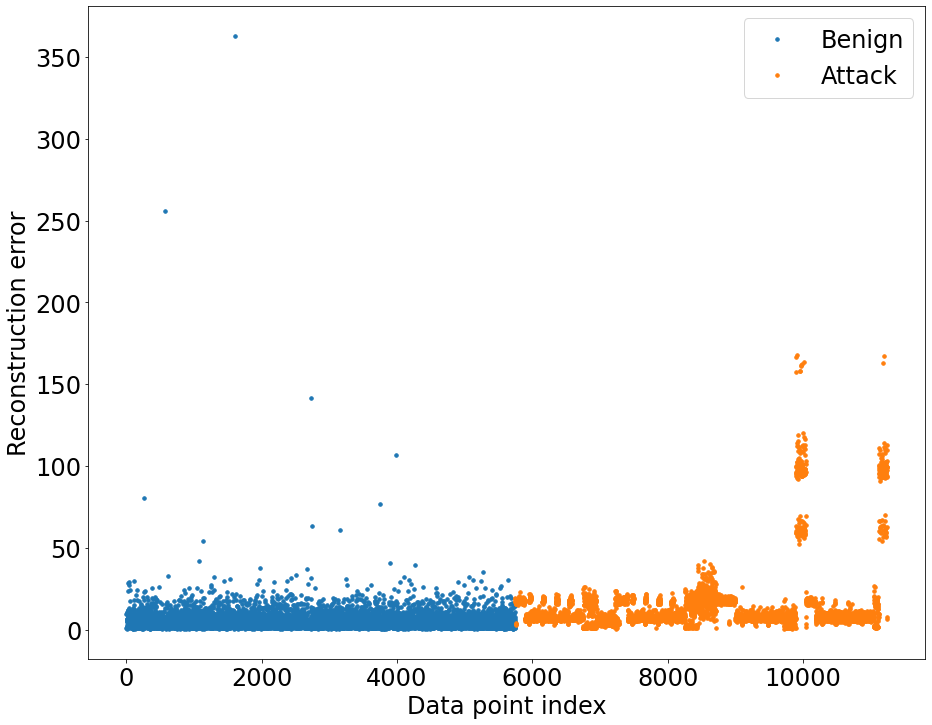

In [31]:
group1 = tst_error_data.groupby('Label')
fig, ax = plt.subplots()
for name, group in group1:
    ax.plot(group.index, group.recon_error, marker='o', ms=3.5, linestyle='',label= "Attack" if name == 1 else "Benign")
ax.legend()
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

7. Perform the metric analysis to evaluate the performance of your classifier at your selected threshold. 

Display the results in terms of TPR, FPR, TNR, FNR, Precision, F1_score and ROC-AUC graph.

In [32]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,roc_curve, recall_score, classification_report, f1_score,precision_recall_fscore_support)

threshold=0.01

y_pred = [1 if e > threshold else 0 for e in tst_error_data.recon_error.values]

cm= confusion_matrix(tst_error_data.Label, y_pred)
print("Confusion matrix:")
print(cm)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

print("\nTotal number of true positives", tp)
print("Total number of false negatives",fn)
print("Total number of false positives",fp)
print("Total number of true negatives",tn)

acc=float(tp+tn)/(tp+tn+fp+fn)

print('\nClassifier Accuracy: %.2f%%' % (acc * 100))

tpr = float(tp)/(tp+fn)

print('True Positive Rate (TPR/Recall/Sensitivity): %.2f%%' % (tpr * 100))

specificity = float (tn)/(tn+fp)

print ("True Negative Rate (TNR/Specificity/selectivity):%.2f%%" % (specificity*100)) 

fpr = float(fp)/(fp+tn)
print("False Positive Rate (FPR): %.2f%%" % (fpr * 100))

fnr = fn/ (fn+ tp)
print("False Negative Rate (FNR): %.2f%%" % (fnr*100))

precision=float(tp)/(tp+fp)
print("Precision/Positive Predictive value:%.2f%%" %(precision*100))

fscore = 2*((precision*tpr)/(precision+tpr))
print("F1-Score: %.2f%%" %(fscore*100))

Confusion matrix:
[[   0 5747]
 [   0 5498]]

Total number of true positives 5498
Total number of false negatives 0
Total number of false positives 5747
Total number of true negatives 0

Classifier Accuracy: 48.89%
True Positive Rate (TPR/Recall/Sensitivity): 100.00%
True Negative Rate (TNR/Specificity/selectivity):0.00%
False Positive Rate (FPR): 100.00%
False Negative Rate (FNR): 0.00%
Precision/Positive Predictive value:48.89%
F1-Score: 65.68%


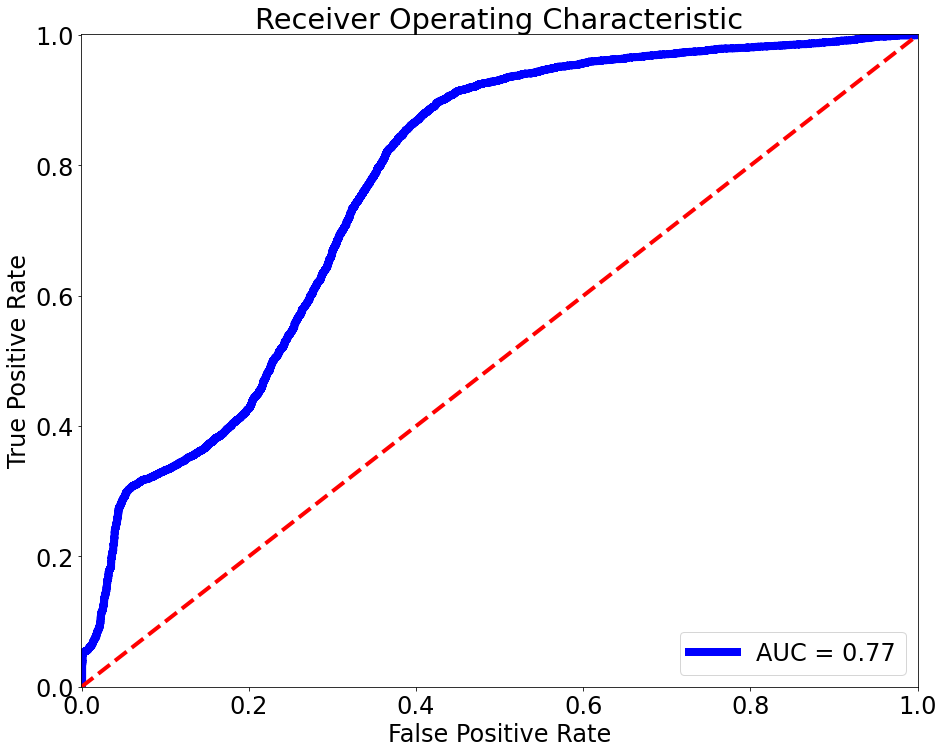

In [33]:
fpr, tpr, thresholds = roc_curve(tst_error_data.Label,tst_error_data.recon_error)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc,linewidth = 8, color='b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--',linewidth = 4)
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()